In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import array_to_img
from utils import load_images
from utils.models import model1 as CNN

In [2]:
IMGLEN = 150

In [3]:
INPUTDIR = 'datasets/test'
CHIPDIR = os.path.join(INPUTDIR, 'chip')
DALEDIR = os.path.join(INPUTDIR, 'dale')

In [4]:
MODEL_WEIGHT_PATH = 'workspace/01-classifier/weights.hdf5'

# load images

In [5]:
chip_images = load_images(CHIPDIR, IMGLEN)
dale_images = load_images(DALEDIR, IMGLEN)

In [6]:
# normalize
chip_images /= 255
dale_images /= 255

# load model

In [7]:
model = CNN(IMGLEN)
model.load_weights(MODEL_WEIGHT_PATH)

In [8]:
chip_images.shape

(10, 150, 150, 3)

# predict

## chip

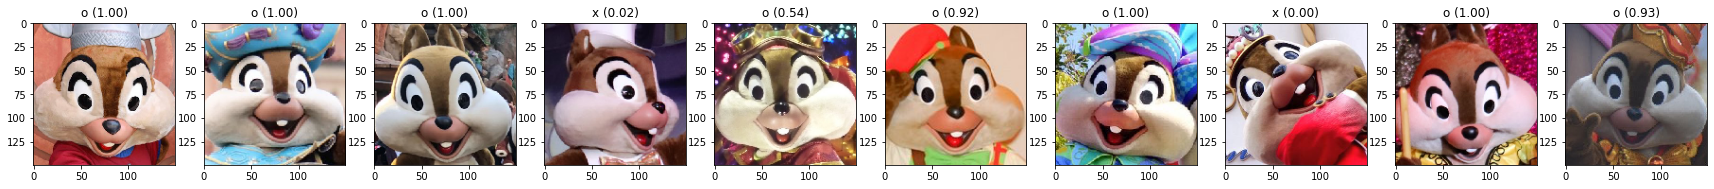

In [9]:
preds = model.predict(chip_images)

plt.figure(figsize=(3*len(preds), 4))
for i, pred in enumerate(preds):
    plt.subplot(1, len(preds), i+1)
    if(pred[0]>pred[1]):
        ox = 'o'
    else:
        ox = 'x'
    plt.title(f'{ox} ({pred[0]:.2f})')
    plt.imshow(array_to_img(chip_images[i]))

## dale

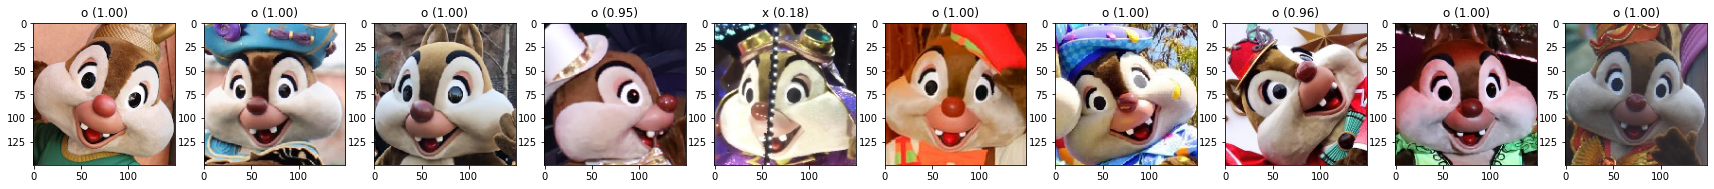

In [10]:
preds = model.predict(dale_images)

plt.figure(figsize=(3*len(preds), 4))
for i, pred in enumerate(preds):
    plt.subplot(1, len(preds), i+1)
    if(pred[0]<pred[1]):
        ox = 'o'
    else:
        ox = 'x'
    plt.title(f'{ox} ({pred[1]:.2f})')
    plt.imshow(array_to_img(dale_images[i]))